In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr


In [3]:
file_levels = '/scratch/e1000/meteoswiss/scratch/swester/input_icon/cosmo_levels.txt'

In [4]:
vct = pd.read_csv(file_levels, sep=' ', skipinitialspace=True, skiprows=1, names=['level', 'vct_a', 'vct_b'], nrows=81)

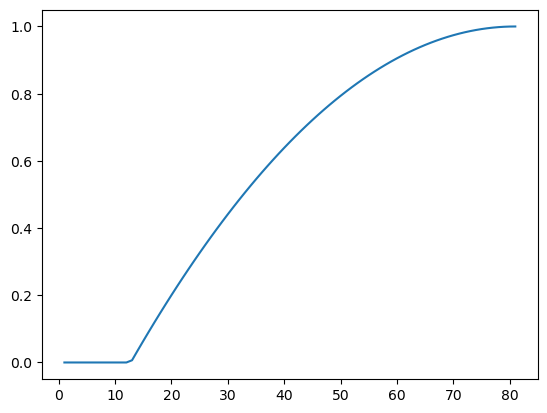

In [5]:
plt.plot(vct['level'],vct['vct_b'])

In [4]:
f_vct = '/scratch/e1000/meteoswiss/scratch/swester/experiments/losvec_case_studies/exp3/out_galchen_laydist3/vgrid_DOM01.nc'

In [5]:
vct = xr.open_dataset(f_vct).squeeze()
vct

<xarray.Dataset>
Dimensions:  (height: 81, ncells_2: 1028172)
Coordinates:
  * height   (height) float64 1.0 2.0 3.0 4.0 5.0 ... 77.0 78.0 79.0 80.0 81.0
Dimensions without coordinates: ncells_2
Data variables:
    vct_a    (height) float64 ...
    vct_b    (height) float64 ...
    z_ifc    (height, ncells_2) float64 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.4 (http://mpimet...
    Conventions:          CF-1.6
    number_of_grid_used:  1
    uuidOfHGrid:          fc046f09-ed97-850e-1e31-8927421b2b60
    nflat:                15

In [7]:
for i, var in enumerate(vct['vct_b'].values): print(f'{i+1} {vct["vct_a"].values[i]:.2f} {var:.3f}')

1 22000.00 0.000
2 21548.48 0.000
3 21101.44 0.000
4 20658.86 0.000
5 20220.75 0.000
6 19787.11 0.000
7 19357.94 0.000
8 18933.23 0.000
9 18513.00 0.000
10 18097.23 0.000
11 17685.94 0.000
12 17279.11 0.000
13 16876.75 0.000
14 16478.86 0.000
15 16085.44 0.000
16 15696.48 0.019
17 15312.00 0.043
18 14931.98 0.067
19 14556.44 0.090
20 14185.36 0.113
21 13818.75 0.136
22 13456.61 0.159
23 13098.94 0.181
24 12745.73 0.203
25 12397.00 0.225
26 12052.73 0.247
27 11712.94 0.268
28 11377.61 0.289
29 11046.75 0.310
30 10720.36 0.330
31 10398.44 0.350
32 10080.98 0.370
33 9768.00 0.390
34 9459.48 0.409
35 9155.44 0.428
36 8855.86 0.447
37 8560.75 0.465
38 8270.11 0.483
39 7983.94 0.501
40 7702.23 0.519
41 7425.00 0.536
42 7152.23 0.553
43 6883.94 0.570
44 6620.11 0.586
45 6360.75 0.602
46 6105.86 0.618
47 5855.44 0.634
48 5609.48 0.649
49 5368.00 0.664
50 5130.98 0.679
51 4898.44 0.694
52 4670.36 0.708
53 4446.75 0.722
54 4227.61 0.736
55 4012.94 0.749
56 3802.73 0.762
57 3597.00 0.775
58 3395.

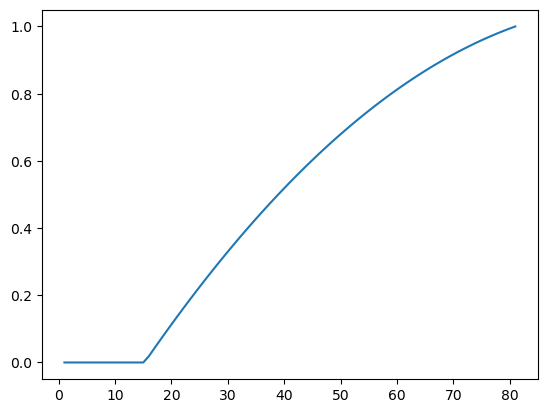

In [8]:
plt.plot(vct['height'].values,vct['vct_b'].values)


1
1.0
22000.0

2
0.9875
21453.4375

3
0.975
20913.750000000004

4
0.9625
20380.937499999996

5
0.95
19855.0

6
0.9375
19335.9375

7
0.925
18823.75

8
0.9125
18318.4375

9
0.9
17820.0

10
0.8875
17328.4375

11
0.875
16843.75

12
0.8625
16365.9375

13
0.85
15895.000000000002
0.006562499999999886

14
0.8375
15430.937499999998
0.03556640625000011

15
0.825
14973.75
0.064140625

16
0.8125
14523.4375
0.09228515625

17
0.8
14080.0
0.12

18
0.7875
13643.437500000002
0.14728515624999988

19
0.775
13213.749999999998
0.1741406250000001

20
0.7625
12790.9375
0.20056640625

21
0.75
12375.0
0.2265625

22
0.7375
11965.937500000002
0.2521289062499999

23
0.725
11563.750000000002
0.2772656249999999

24
0.7125
11168.437499999998
0.30197265625000014

25
0.7
10779.999999999998
0.3262500000000001

26
0.6875
10398.4375
0.35009765625

27
0.675
10023.750000000002
0.3735156249999999

28
0.6625
9655.937500000002
0.39650390624999987

29
0.65
9294.999999999998
0.4190625000000001

30
0.6375
8940.937499999998
0.44

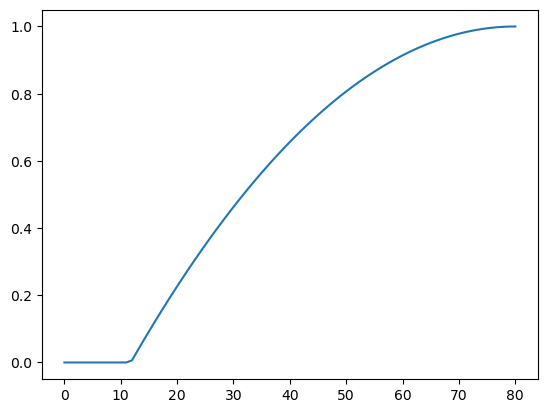

In [15]:
# adapt from fortran code
nlev = 80
stretch_fac = 1.0
top_height = 22000.0
z_flat = 16000.0

vct_b = np.zeros(nlev+1)
for k in range(1,nlev+2):
    print('')
    print(k)
    x1 = (nlev + 1 - k) / nlev
    print(x1)
    z_height = top_height * x1 * (stretch_fac * x1 + 1.0 - stretch_fac)
    print(z_height)
    if (z_height >= z_flat):
        continue
    else:
        vct_b[k-1] = (z_flat - z_height) / z_flat
        print(vct_b[k-1])

plt.plot(np.arange(nlev+1), vct_b)


In [7]:
def vctb_from_vcta(vct_a, flat_height):
    n_levels = len(vct_a)
    # get flat_level
    flat_levels = np.sum(vct_a > flat_height)
    nf_levels = 0
    vct_b = np.zeros(len(vct_a))
    for i,a in enumerate(vct_a):
        if a > flat_height:
            vct_b[i] = 0.0
        else:
            vct_b[i] = (flat_height - a) / flat_height

    return vct_b

        



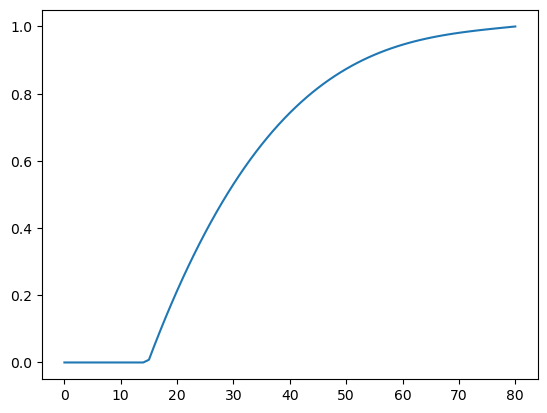

In [9]:
plt.plot(np.arange(81), vctb_from_vcta(vct['vct_a'].values, flat_height=12000))

In [10]:
vct_a = vct['vct_a'].values
vct_b = vctb_from_vcta(vct_a, 12000)
for i in range(81):
    print(f'{(i+1):2}  {vct_a[i]:10.3f}   {vct_b[i]:6.3f}')

 1   22000.000    0.000
 2   21187.520    0.000
 3   20396.250    0.000
 4   19625.890    0.000
 5   18876.130    0.000
 6   18146.680    0.000
 7   17437.220    0.000
 8   16747.450    0.000
 9   16077.080    0.000
10   15425.800    0.000
11   14793.300    0.000
12   14179.290    0.000
13   13583.470    0.000
14   13005.530    0.000
15   12445.190    0.000
16   11902.130    0.008
17   11376.060    0.052
18   10866.690    0.094
19   10373.710    0.136
20    9896.840    0.175
21    9435.770    0.214
22    8990.210    0.251
23    8559.870    0.287
24    8144.450    0.321
25    7743.660    0.355
26    7357.210    0.387
27    6984.800    0.418
28    6626.150    0.448
29    6280.970    0.477
30    5948.960    0.504
31    5629.830    0.531
32    5323.310    0.556
33    5029.090    0.581
34    4746.910    0.604
35    4476.460    0.627
36    4217.460    0.649
37    3969.640    0.669
38    3732.700    0.689
39    3506.370    0.708
40    3290.360    0.726
41    3084.400    0.743
42    2888.200  